<a href="https://colab.research.google.com/github/dimageneer/AIEFFEL_QUEST/blob/main/Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
data = sns.load_dataset('taxis')

### 통계량 확인하기
* 평균, 중앙값, 최빈값 구하기


In [ ]:
mean_val = data['total'].mean()
median_val = data['total'].median()

# 최빈값을 구하기 위해 구간별로 데이터 나누고 범주형 데이터로 변환하기
binned_total = pd.cut(data['total'], bins=100, right=False)
modal_interval = binned_total.mode()[0]
mode_val = modal_interval.mid

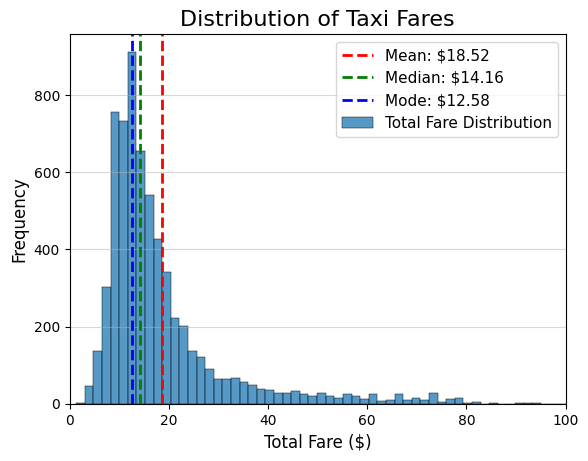

In [ ]:
plt.figure()

sns.histplot(data['total'], bins=100, label='Total Fare Distribution')
plt.xlim(0,100)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='--', linewidth=2, label=f'Mode: ${mode_val:.2f}')

plt.title('Distribution of Taxi Fares', fontsize=16)
plt.xlabel('Total Fare ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.5)

plt.show()

### 데이터의 분포 확인하기
* 상자수염그림
* 바이올린 플롯
* 스웜 플롯

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


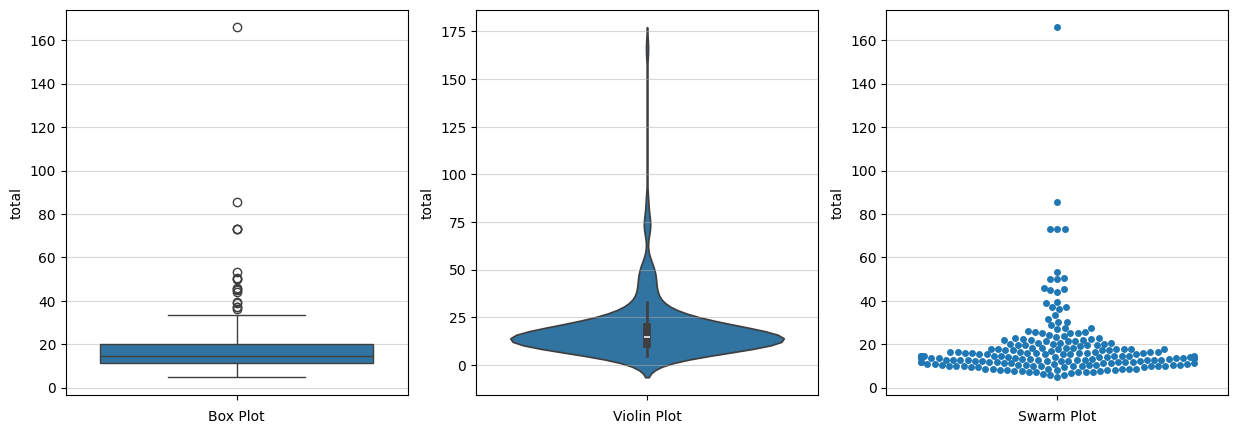

In [ ]:
taxis_sample = data['total'].sample(n=200, random_state=42)
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.boxplot(taxis_sample)
plt.xlabel('Box Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5)

plt.subplot(1, 3, 2)
sns.violinplot(taxis_sample)
plt.xlabel('Violin Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5)

plt.subplot(1, 3, 3)
sns.swarmplot(taxis_sample)
plt.xlabel('Swarm Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5)

plt.show()

### 왜도와 첨도 확인하기
왜도: 데이터 분포의 비대칭성을 나타내는 지표  
첨도: 분포의 뾰족한 정도와 꼬리의 두께를 나타내는 지표

In [ ]:
skewness = data['total'].skew()
kurtosis = data['total'].kurt()

print(f"왜도 (Skewness): {skewness:.4f}")
print(f"첨도 (Kurtosis): {kurtosis:.4f}")

왜도 (Skewness): 3.0933
첨도 (Kurtosis): 15.0657


### 큰 수의 법칙과 중심극한정리

**큰 수의 법칙(Law of Large Numbers)**
* 표본의 크기가 커질수록 그 표본의 평균이 모평균(기댓값)에 가까워진다는 원리

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def coin_flip_simulation(num_flips):
    heads_count = 0
    probabilities = []

    # num_flips 만큼 0(뒷면) 또는 1(앞면)을 무작위로 생성
    for i in range(1, num_flips+1):
        if random.randint(0, 1) == 1:
            heads_count += 1

        # 현재까지 총 던진 횟수 대비 앞면이 나온 횟수의 비율을 계산하여 저장
        current_probability = heads_count / i
        probabilities.append(current_probability)

    return probabilities

In [ ]:
# 동전 던지기 횟수 설정
total_flips = 1000

results = coin_flip_simulation(total_flips)

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, total_flips +1), results)
plt.axhline(y=0.5, color='r', linestyle='--', label='Theoretical Probability (0.5)')

plt.title('Law of Large Numbers: Coin Flip Simulation')
plt.xlabel('Number of Flips')
plt.ylabel('Probability of Heads')
plt.legend()
plt.grid(True)

plt.xlim(0, total_flips)
plt.ylim(0, 1)

plt.show()

**중심극한정리(Central Limit Theorem, CLT)**
* 모집단의 분포와 상관 없이, 표본의 크기가 충분히 크다면 표본 평균의 분포는 정규분포에 가까워짐

In [ ]:
from scipy.stats import binom, uniform, norm

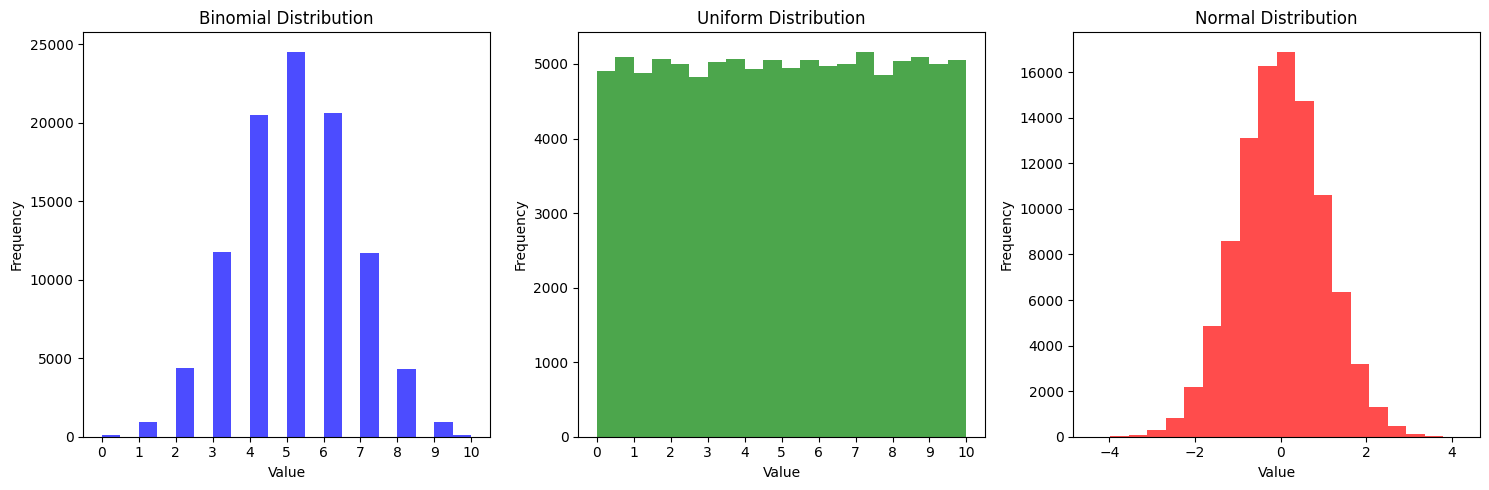

In [ ]:
# 모집단 생성
np.random.seed(42)

sample_size = 100000
# 이항 분포 샘플
binomial_data = binom.rvs(n=10, p=0.5, size=sample_size)
# 균등 분포 샘플
uniform_data = uniform.rvs(loc=0, scale=10, size=sample_size)
# 정규 분포 샘플
normal_data = norm.rvs(loc=0, scale=1, size=sample_size)

#시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(binomial_data, bins=20, color="blue", alpha=0.7)
plt.title("Binomial Distribution")
plt.xlabel("Value")
plt.xticks(range(0,11))
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(uniform_data, bins=20, color="green", alpha=0.7)
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xticks(range(0,11))

plt.subplot(1, 3, 3)
plt.hist(normal_data, bins=20, color="red", alpha=0.7)
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
# 표본 추출 횟수
num_samples = 500
sample_means = {
    "Binomial": [],
    "Uniform": [],
    "Normal": []
}

# 표본크기
sample_size = 50
#numpy.choice을 통해 샘플의 평균을 구하여 sample_means 딕셔너리 자료형에 각각 저장
for _ in range(num_samples):
    sample_means["Binomial"].append(np.mean(np.random.choice(binomial_data, size=sample_size)))
    sample_means["Uniform"].append(np.mean(np.random.choice(uniform_data, size=sample_size)))
    sample_means["Normal"].append(np.mean(np.random.choice(normal_data, size=sample_size)))

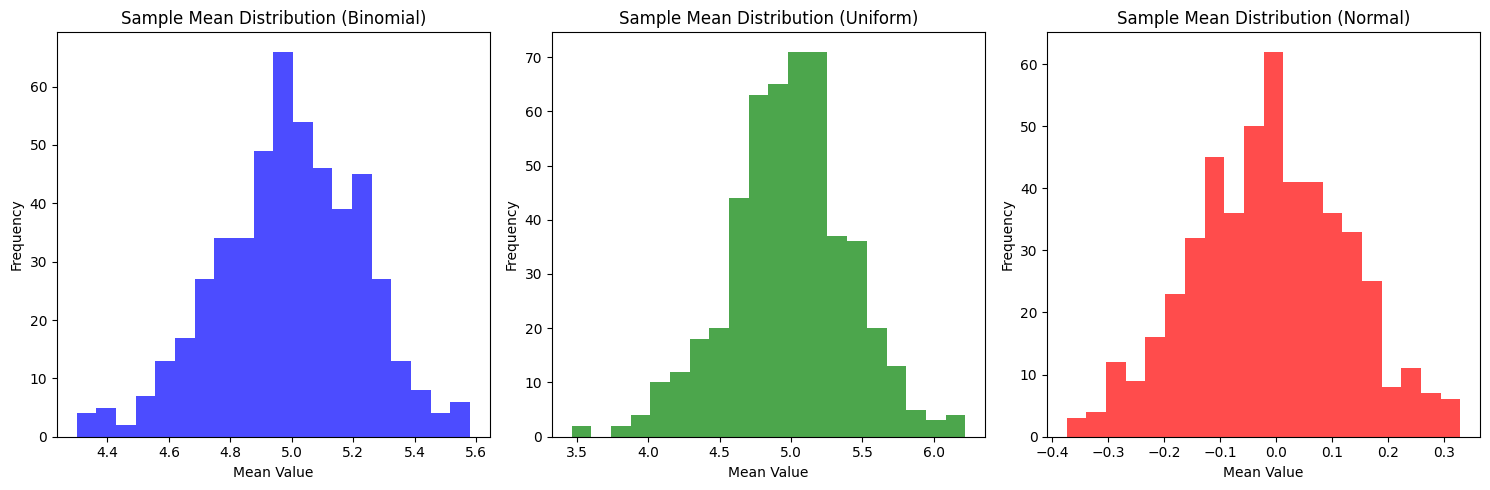

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(sample_means["Binomial"], bins=20, color="blue", alpha=0.7)
plt.title("Sample Mean Distribution (Binomial)")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(sample_means["Uniform"], bins=20, color="green", alpha=0.7)
plt.title("Sample Mean Distribution (Uniform)")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(sample_means["Normal"], bins=20, color="red", alpha=0.7)
plt.title("Sample Mean Distribution (Normal)")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 신뢰구간 구하기

In [ ]:
from scipy import stats

In [ ]:
# 모집단 생성
# 평균 175, 표준편차10인 정규분포를 따르는 10만 명의 키 데이터 생성
population_mean = 175
population_std = 10
population = norm.rvs(loc=population_mean, scale=population_std, size=100000)

In [ ]:
# 표본 추출
sample_size = 100
sample = np.random.choice(population, size=sample_size)

In [ ]:
# 표본 통계량 계산
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1) # ddof = 자유도(Degrees of Freedom) 의미

print(f'표본 평균: {sample_mean}')
print(f'표본 표준 편차: {sample_std}')

표본 평균: 173.97473900830374
표본 표준 편차: 11.005435353058896


In [ ]:
# 신뢰구간 계산
confidence_level = 0.95

n = len(sample)
dof = n - 1

# 신뢰수준에 따른 임계값 찾기
t_value = stats.t.ppf((1 + confidence_level) / 2, df=dof)

# 표준 오차 계산
std_error = sample_std / np.sqrt(n)

# 오차 범위
margin_of_error = t_value * std_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

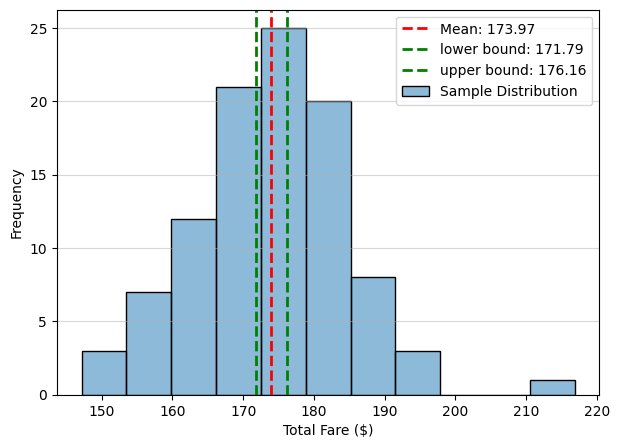

In [ ]:
plt.figure(figsize=(7, 5))

sns.histplot(sample, alpha=0.5, label='Sample Distribution')

plt.axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {sample_mean:.2f}')
plt.axvline(lower_bound, color='green', linestyle='--', linewidth=2, label=f'lower bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', linewidth=2, label=f'upper bound: {upper_bound:.2f}')

plt.xlabel('Total Fare ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.5)

plt.show()

In [ ]:
print("--- 표본 데이터 분석 결과 ---")
print(f"표본 크기: {n}")
print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}\n")
print(f"추정된 95% 신뢰구간: [{lower_bound:.2f}, {upper_bound:.2f}]")

print("--- 95% 신뢰구간 추정 결과 ---")
print(f"실제 모평균 (우리가 모른다고 가정한 값): {population_mean}")

# 신뢰구간이 실제 모평균을 포함하는지 확인
if lower_bound <= population_mean <= upper_bound:
    print("\n🎉 추정 성공! 신뢰구간이 실제 모평균을 포함했습니다.")
else:
    print("\n😥 추정 실패! 신뢰구간이 실제 모평균을 포함하지 못했습니다.")

--- 표본 데이터 분석 결과 ---
표본 크기: 100
표본 평균: 173.97
표본 표준편차: 11.01

추정된 95% 신뢰구간: [171.79, 176.16]
--- 95% 신뢰구간 추정 결과 ---
실제 모평균 (우리가 모른다고 가정한 값): 175

🎉 추정 성공! 신뢰구간이 실제 모평균을 포함했습니다.


### 부트스트랩

In [ ]:
# 모집단 생성
# 평균 175, 표준편차10인 정규분포를 따르는 10만 명의 키 데이터 생성
population_mean = 175
population_std = 10
population = norm.rvs(loc=population_mean, scale=population_std, size=100000)

In [ ]:
# 표본 추출
sample_size = 100
sample = np.random.choice(population, size=sample_size)

In [ ]:
# 부트스트랩 과정
n_bootstrap = 10000
bootstrap_means = []

np.random.seed(42)
for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(
        sample,
        size=sample_size,
        replace = True
    )
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

In [ ]:
# 부트스트래핑으로 신뢰구간 구하기
confidence_level = 0.95
lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)

In [ ]:
print(f"--- 원본 표본 데이터 ---")
print(f"표본 크기: {len(sample)}")
print(f"표본 평균: {np.mean(sample):.2f}")
print(f"추정된 95% 신뢰구간: [{lower_bound:.2f}, {upper_bound:.2f}]\n")

print(f"--- 부트스트랩 95% 신뢰구간 추정 결과 ---")
print(f"실제 모평균 (우리가 모른다고 가정한 값): {population_mean}")


# 신뢰구간이 실제 모평균을 포함하는지 확인
if lower_bound <= population_mean <= upper_bound:
    print("\n🎉 추정 성공! 신뢰구간이 실제 모평균을 포함했습니다.")
else:
    print("\n😥 추정 실패! 신뢰구간이 실제 모평균을 포함하지 못했습니다.")

--- 원본 표본 데이터 ---
표본 크기: 100
표본 평균: 177.33
추정된 95% 신뢰구간: [175.40, 179.22]

--- 부트스트랩 95% 신뢰구간 추정 결과 ---
실제 모평균 (우리가 모른다고 가정한 값): 175

😥 추정 실패! 신뢰구간이 실제 모평균을 포함하지 못했습니다.
